# Pressure Balance - Calculation
### Analysis of the experimental data for Tungsten flow
###  - Generate plots of Electron Density, Velocity, Temperature VS space (distance between the wires and the obstacle)
###  - Repeat in terms of pressures (RAM pressure, Magnetic and Thermal Pressure)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

sys.path.append('C:\\Users\\sm13118\\OneDrive - Imperial College London\\dev\\magpie_tools\\code')

from magpie_data import NeLMap, Interferogram, Shadowgram

# Starting from interferometry - electron density map - s1019_16 Tungsten with planar obstacle
## ONLY end-on interferometry, side-on cannot be traced

# End-On Interferometry - s1019_16 

In [6]:
%cd "C:\Users\sm13118\OneDrive - Imperial College London\Research\Experiments\Plasma Wall-Collision Experiment\data\Oct_2016\s1019_16 Planar Cu Target - W - faraday"

C:\Users\sm13118\OneDrive - Imperial College London\Research\Experiments\Plasma Wall-Collision Experiment\data\Oct_2016\s1019_16 Planar Cu Target - W - faraday


In [7]:
fn_bk_end532 = 's1019_16 532 Interferometry (2)' + '.JPG'
fn_sh_end532 = 's1019_16 532 Interferometry (3)' + '.JPG'

rot_if = 89
scale_if = 140

if_bk_end532 = Interferogram(fn_bk_end532, scale=scale_if, rot_angle=rot_if, flip_lr=False) #this creates an interferogram object
if_sh_end532 = Interferogram(fn_sh_end532, scale=scale_if, rot_angle=rot_if, flip_lr=False) #this creates an interferogram object

# Side-On Shadowgraphy - s1013_16 

In [8]:
%cd "C:\Users\sm13118\OneDrive - Imperial College London\Research\Experiments\Plasma Wall-Collision Experiment\data\Oct_2016\s1013_16 Planar Cu Target - W - Burdiscope"

C:\Users\sm13118\OneDrive - Imperial College London\Research\Experiments\Plasma Wall-Collision Experiment\data\Oct_2016\s1013_16 Planar Cu Target - W - Burdiscope


In [9]:
fn_shsh_side532 = 's1013_16 IR shadow (1)' + '.JPG'
fn_shbk_side532 = 's1013_16 IR shadow (2)' + '.JPG'

rot_sh = 0
scale_sh = 202

sh_bk_side532 = Shadowgram(fn_shbk_side532, scale=scale_sh, rot_angle=rot_sh, flip_lr=False) #this creates an Shadowgram object
sh_sh_side532 = Shadowgram(fn_shsh_side532, scale=scale_sh, rot_angle=rot_sh, flip_lr=False) #this creates an Shadowgram object

# End-On Interferometry - s1019_16

In [10]:
%cd "C:\Users\sm13118\OneDrive - Imperial College London\Research\Experiments\Plasma Wall-Collision Experiment\data\Interferometry\Tungsten"

C:\Users\sm13118\OneDrive - Imperial College London\Research\Experiments\Plasma Wall-Collision Experiment\data\Interferometry\Tungsten


In [11]:
fn_neL_side532 = 's1019_16 532nm neL.txt'

scale_if = 140
rot_if = 89

end_532_ne = NeLMap(fn_neL_side532, scale=scale_if, rot_angle=rot_if, flip_lr = False,  multiply_by=1)

## Set origin for both shadowgraphy and intereferometry

In [12]:
## Set origin and crop data
origin_if_end532=(2600,1550)
origin_sh_532=(2000,2600)

e=[-5,5,-10,0]

if_bk_end532.set_origin(origin=origin_if_end532, extent=e, verbose = True)
if_sh_end532.set_origin(origin=origin_if_end532, extent=e, verbose = True)

sh_bk_side532.set_origin(origin=origin_sh_532, extent=e, verbose = True)
sh_sh_side532.set_origin(origin=origin_sh_532, extent=e, verbose = True)

end_532_ne.set_origin(origin=origin_if_end532, extent=e, verbose = True)

ymin, ymax, xmin, xmax: 
1900 3301 150 1551
Limits in y and x:
(4807, 3250)
ymin, ymax, xmin, xmax: 
1900 3301 150 1551
Limits in y and x:
(4807, 3250)
ymin, ymax, xmin, xmax: 
990 3011 580 2601
Limits in y and x:
(3168, 4752)
ymin, ymax, xmin, xmax: 
990 3011 580 2601
Limits in y and x:
(3168, 4752)
ymin, ymax, xmin, xmax: 
1900 3301 150 1551
Limits in y and x:
(4807, 3250)


## Pretty Plot: RAW End-On Interferometry, End-On Density Map, Side-On Shadowgraphy 

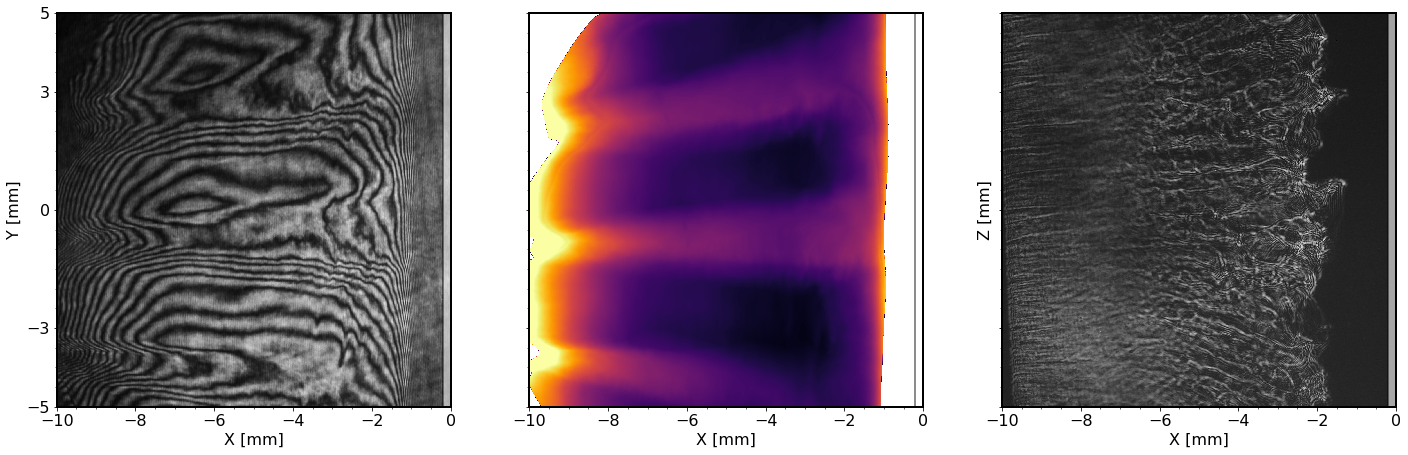

In [20]:

gridOn  = False      # enable grid
obstOn  = True       # enable obstacle
refAxis = False      # enable Lines reference
scaleOn = False      # enable Scale reference
saveOn  = False      # enable Save
barOn   = False      # enable color bar

grid = gridspec.GridSpec(1,3)
fig  = plt.figure(figsize=(24,16))

ax0  = fig.add_subplot(grid[0])
ax1  = fig.add_subplot(grid[1],sharey=ax0)
ax2  = fig.add_subplot(grid[2],sharey=ax0)

# ----------------------------------------------

plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax0.get_xticklabels(), visible=True)
plt.setp(ax1.get_xticklabels(), visible=True)
plt.setp(ax2.get_xticklabels(), visible=True)

ax0.set_xlabel('X [mm]', fontsize=16)
ax1.set_xlabel('X [mm]', fontsize=16)
ax2.set_xlabel('X [mm]', fontsize=16)
ax2.set_ylabel('Z [mm]', fontsize=16)

ax0.set_ylabel('Y [mm]', fontsize=16)

for ax in [ax0,ax1,ax2]:
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(16)

for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(2)
    ax1.spines[axis].set_linewidth(2)
    ax2.spines[axis].set_linewidth(2)


for ax in [ax0,ax1,ax2]:
    if gridOn == True:
        ax.grid(True, linestyle='--', alpha = 0.5)
        ax.tick_params(labelsize=20)
        ax.minorticks_on()
    if obstOn == True:
        ax.add_patch(plt.Rectangle((-0.2, -8.0), 16, 16, fc ='white', ec ='black', lw = 1.5, alpha = 0.6))
        ax.minorticks_on()
    if refAxis == True:
        ax.hlines(0, -6, 6, colors='w', linestyles='--', alpha = 0.4)
        ax.vlines(0, -8, 8, colors='w', linestyles='--', alpha = 0.4)
    if scaleOn == True:
        annotation_line(ax=ax, text='1 mm', xmin=5, xmax=6, y=-7, ytext=-6.6, linewidth=2, linecolor='white', fontsize=14)

    ax.set_ylim([-5,5])
    ax.set_yticks([-5,-3,0,3,5])

if_sh_end532.plot_data_mm(ax=ax0, cmap = "gray").set_clim(0,1)          # the DataMap object provides a function to plot the raw data, which is inherited by Interferogram
mask, im = end_532_ne.plot_data_mm(ax=ax1, multiply_by = 1e-18, clim=[0,6], maskvalue = .2)
sh_sh_side532.plot_data_mm(ax=ax2, cmap = "gray").set_clim(0,1)

if barOn == True:
    ax_divider = make_axes_locatable(ax0)
    cax = ax_divider.append_axes("right", size="4%", pad="2%")
    cb = colorbar(im, cax=cax, ticks=[0,2,4,6,8,10,12,15])
    cb.set_label_text(r'$n_eL$ ($\times$ 10$^{18}$ cm$^{-2}$)',fontsize=24)
    cb.ax.tick_params(labelsize=24, pad=5, length=6, width=1, direction = 'in')

# Density profile along YX - Lineouts

In [14]:
w = 0.1
x_mm = -8.1
end_532_ne.create_lineout(start = (-5,x_mm), end = (5,x_mm), lineout_width_mm = w)        

C:\Users\sm13118\OneDrive - Imperial College London\dev\magpie_tools\code\magpie_data.py:77: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  #use scikit image to do a nice lineout on the cropped array


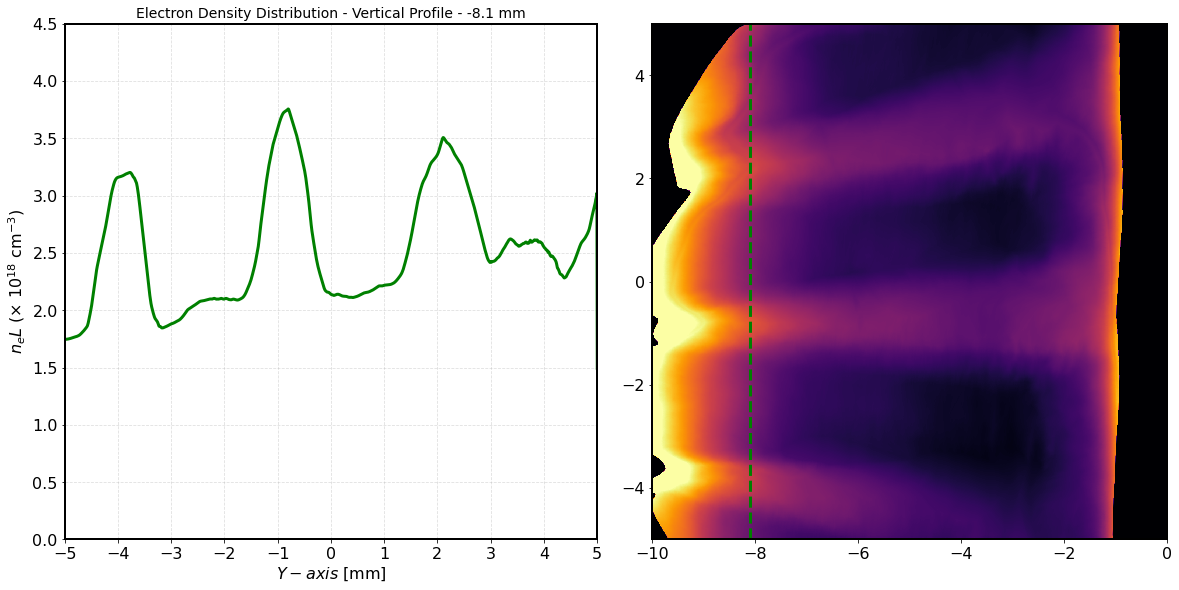

In [15]:
element = 'W'

grid = gridspec.GridSpec(1,2)
fig = plt.figure(figsize=(16.6,8.3))

ax0 = fig.add_subplot(grid[0])
ax1 = fig.add_subplot(grid[1])

for axis in ['top','bottom','left','right']:
    ax0.spines[axis].set_linewidth(2)
    ax1.spines[axis].set_linewidth(2)


ax0.tick_params(labelsize=16)
ax1.tick_params(labelsize=16)

ax0.grid(True, linestyle='--', alpha = 0.4)


ax0.plot(end_532_ne.mm, end_532_ne.lo*1e-18, label="x = "+str(x_mm)+" mm", lw=3, c='green')

im = end_532_ne.plot_data_mm(ax=ax1, multiply_by = 1e-18, clim=[0,6])   
ax1.plot([x_mm,x_mm],[-5,5], lw=3, ls='dashed',color='green')


ax0.set_xlim([-5,5])
ax0.set_ylim([0,4.5])

ax0.set_xticks(np.arange(-5,5.1,1))

ax0.set_xlabel(r'$Y-axis$ [mm]', fontsize=16)
ax0.set_ylabel(r'$n_eL$ ($\times$ 10$^{18}$ cm$^{-3}$)', fontsize=16)


ax0.set_title('Electron Density Distribution - Vertical Profile - ' + str(x_mm) + ' mm', fontsize = '14')
# plt.savefig('neLvertical_'+ str(x_mm) + element + '.png', dpi=330)

fig.tight_layout()

(1401, 1401)


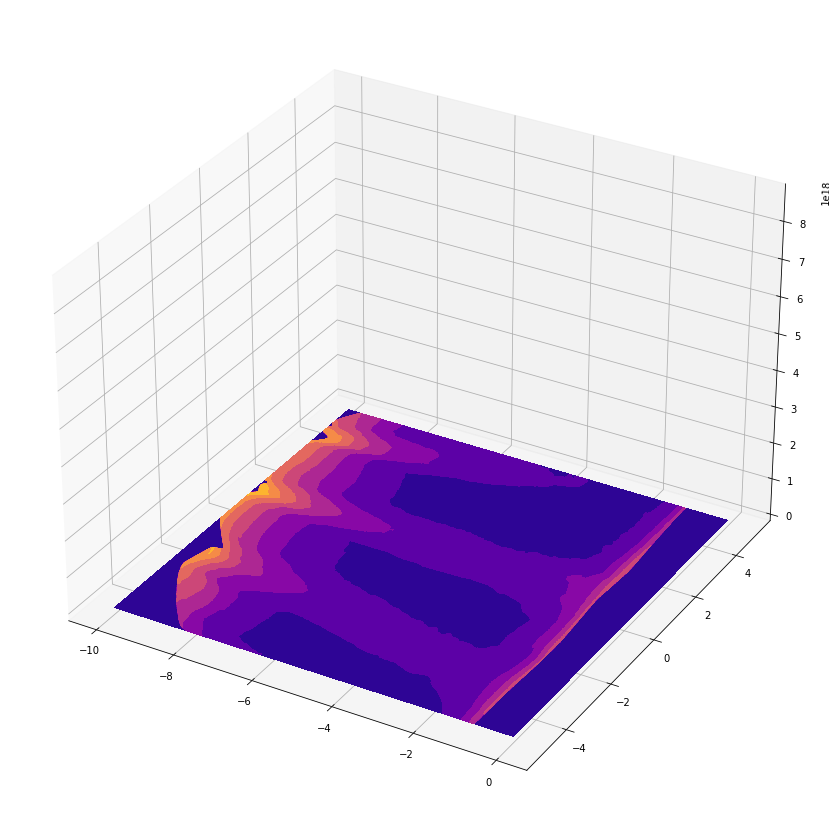

In [16]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

print(end_532_ne.data_c.shape)

nr = np.linspace(-10,0,1401)
nc = np.linspace(-5,5,1401)

x, y = np.meshgrid(nr, nc)

# ax.plot_surface(x,y,end_532_ne.data_c, cmap = "inferno")

cset = ax.contourf(x, y, end_532_ne.data_c, zdir='z', offset=0,
        levels=np.linspace(0,1e19,10),cmap=plt.cm.plasma)

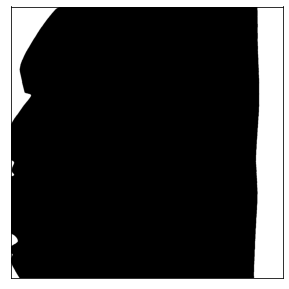

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(mask, cmap='gray', aspect=1)